<a href="https://colab.research.google.com/github/Parthasarathi009/PySpark/blob/master/PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
%cd /content/drive/My\ Drive/LearningD/Application\ of\ AI/
!pwd

/content/drive/My Drive/LearningD/Application of AI
/content/drive/My Drive/LearningD/Application of AI


In [14]:
!ls -a

'Application of AI_ Discussion.docx'	    Small_Car_Data.csv
 EAI6010_SamantarayParthasarathiHW01.docx


In [12]:
!pwd

/content/drive/My Drive/LearningD


In [22]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 59kB/s 
     |████████████████████████████████| 204kB 52.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=7581e7594f52f5bbb903e31e0e6f23c58ffa200f8e6e479edb0f0a9c8639fbe7
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/My Drive/LearningD/Application of AI/spark-2.4.5-bin-hadoop2.7"

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [128]:
cars= spark.read.csv("Small_Car_Data.csv")
cars.show(3,False) # see 3 rows

+----+---+---+---+-------------+---------------------------------+---+---+-------+----+
|_c0 |_c1|_c2|_c3|_c4          |_c5                              |_c6|_c7|_c8    |_c9 |
+----+---+---+---+-------------+---------------------------------+---+---+-------+----+
|12  |8  |307|130|chevrolet    |chevrolet chevelle malibu        |70 |18 |USA    |3504|
|11.5|8  |350|165|buick        |buick skylark 320                |70 |15 |USA    |3693|
|11  |8  |318|150|plymouth     |plymouth satellite               |70 |18 |USA    |3436|
+----+---+---+---+-------------+---------------------------------+---+---+-------+----+
only showing top 3 rows



In [72]:
print(cars.printSchema)
cars=cars.withColumn('_c2',cars._c2.cast("integer"))
cars=cars.withColumn('_c3',cars._c3.cast("integer"))
print(cars.printSchema)

<bound method DataFrame.printSchema of DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string]>
<bound method DataFrame.printSchema of DataFrame[_c0: string, _c1: string, _c2: int, _c3: int, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string]>


In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [73]:
assembler = VectorAssembler(inputCols=["_c2"], outputCol = 'features')
output = assembler.transform(cars)
#Input vs Output
cars_1 = output.select("features","_c3")
cars_1.show()

+--------+---+
|features|_c3|
+--------+---+
| [307.0]|130|
| [350.0]|165|
| [318.0]|150|
| [304.0]|150|
| [302.0]|140|
| [429.0]|198|
| [454.0]|220|
| [440.0]|215|
| [455.0]|225|
| [390.0]|190|
| [133.0]|115|
| [350.0]|165|
| [351.0]|153|
| [383.0]|175|
| [360.0]|175|
| [383.0]|170|
| [340.0]|160|
| [302.0]|140|
| [400.0]|150|
| [455.0]|225|
+--------+---+
only showing top 20 rows



In [0]:
cars_1=cars_1.withColumnRenamed("_c3",'horsepower')

In [76]:
train, test = cars_1.randomSplit([0.9,0.1],seed =9)

lr= LinearRegression(labelCol= 'horsepower', regParam=0.1).fit(train)
pred_lr= lr.transform(test)
pred_lr.show(3, False)

+--------+----------+-----------------+
|features|horsepower|prediction       |
+--------+----------+-----------------+
|[91.0]  |68        |69.67646031481843|
|[119.0] |82        |79.74165014779364|
|[151.0] |90        |91.24472424262242|
+--------+----------+-----------------+
only showing top 3 rows



In [79]:
from pyspark.ml.evaluation import RegressionEvaluator
print("R2 is :",RegressionEvaluator(labelCol= 'horsepower',metricName="r2").evaluate(pred_lr))

R2 is : 0.8122631744877152


In [0]:
import matplotlib.pyplot as plt

In [190]:
cars_pd=cars.toPandas()
print(cars_pd.head(2))

   acceleration  ...                                         features21
0          3504  ...  (0.0, 1.0, 3504.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0....
1          3693  ...  (0.0, 1.0, 3693.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....

[2 rows x 21 columns]


In [0]:
coef=lr.coefficients
inter=lr.intercept

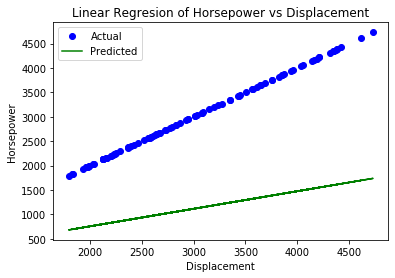

In [189]:
plt.plot(cars_pd.displacement , cars_pd.horsepower,'bo',label='Actual')
plt.plot(cars_pd.displacement , cars_pd.displacement*coef+inter, 'g-',label='Predicted')
plt.xlabel("Displacement")
plt.ylabel("Horsepower")
plt.title("Linear Regresion of Horsepower vs Displacement")
plt.legend(loc='best')
plt.show()


# **Problem2**

Treat: cylinders, displacement, manufacturer, model year, origin and weight as features and use linear regression to predict two target variable: horsepower and acceleration. Please note that some of those are categorical variables. Use test data to assess quality of prediction for both target variables. Which of two target variables is easier to predict, in the sense that predicted values differ less from the original values

In [129]:
cars.show(1,False)
cars=cars.withColumnRenamed('_c0',"acceleration")
cars=cars.withColumnRenamed('_c1',"cylinders")
cars=cars.withColumnRenamed('_c2',"displacement")
cars=cars.withColumnRenamed('_c3',"horsepower")
cars=cars.withColumnRenamed('_c4',"manufacturer")
cars=cars.withColumnRenamed('_c5',"model")
cars=cars.withColumnRenamed('_c6',"model_year")
cars=cars.withColumnRenamed('_c7',"mpg")
cars=cars.withColumnRenamed('_c8',"origin")
cars=cars.withColumnRenamed('_c9',"weight")
cars=cars.dropna()
cars.show(1,False)

+---+---+---+---+-------------+---------------------------------+---+---+-------+----+
|_c0|_c1|_c2|_c3|_c4          |_c5                              |_c6|_c7|_c8    |_c9 |
+---+---+---+---+-------------+---------------------------------+---+---+-------+----+
|12 |8  |307|130|chevrolet    |chevrolet chevelle malibu        |70 |18 |USA    |3504|
+---+---+---+---+-------------+---------------------------------+---+---+-------+----+
only showing top 1 row

+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+
|acceleration|cylinders|displacement|horsepower|manufacturer |model                            |model_year|mpg|origin |weight|
+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+
|12          |8        |307         |130       |chevrolet    |chevrolet chevelle malibu        |70        |18 |USA    |3504  |
+------------+---------+---------

In [130]:
cars.printSchema

<bound method DataFrame.printSchema of DataFrame[acceleration: string, cylinders: string, displacement: string, horsepower: string, manufacturer: string, model: string, model_year: string, mpg: string, origin: string, weight: string]>

In [0]:
cars=cars.withColumn('weight',cars.weight.cast("integer"))
cars=cars.withColumn('displacement',cars.weight.cast("integer"))
cars=cars.withColumn('horsepower',cars.weight.cast("integer"))
cars=cars.withColumn('acceleration',cars.weight.cast("integer"))

In [0]:
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.feature import StringIndexer

In [132]:
cars=StringIndexer(inputCol='cylinders', outputCol='cylinders_idx').fit(cars).transform(cars)
cars=StringIndexer(inputCol='manufacturer', outputCol='manufacturer_idx').fit(cars).transform(cars)
cars=StringIndexer(inputCol='model', outputCol='model_idx').fit(cars).transform(cars)
cars=StringIndexer(inputCol='model_year', outputCol='model_year_idx').fit(cars).transform(cars)
cars=StringIndexer(inputCol='origin', outputCol='origin_idx').fit(cars).transform(cars)
cars.show(2, False)

+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+-------------+----------------+---------+--------------+----------+
|acceleration|cylinders|displacement|horsepower|manufacturer |model                            |model_year|mpg|origin |weight|cylinders_idx|manufacturer_idx|model_idx|model_year_idx|origin_idx|
+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+-------------+----------------+---------+--------------+----------+
|3504        |8        |3504        |3504      |chevrolet    |chevrolet chevelle malibu        |70        |18 |USA    |3504  |1.0          |1.0             |70.0     |0.0           |0.0       |
|3693        |8        |3693        |3693      |buick        |buick skylark 320                |70        |15 |USA    |3693  |1.0          |10.0            |89.0     |0.0           |0.0       |
+------------+---------+------

In [133]:

cars=OneHotEncoderEstimator(
    inputCols=['cylinders_idx','manufacturer_idx','model_idx','model_year_idx','origin_idx'],
    outputCols=['type_cylinders','type_manufacturer','type_model','type_model_year','type_origin'])\
    .fit(cars).transform(cars)

cars.show(2, False)

+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+-------------+----------------+---------+--------------+----------+---------------+--------------+---------------+-----------------+-------------+
|acceleration|cylinders|displacement|horsepower|manufacturer |model                            |model_year|mpg|origin |weight|cylinders_idx|manufacturer_idx|model_idx|model_year_idx|origin_idx|type_model     |type_cylinders|type_model_year|type_manufacturer|type_origin  |
+------------+---------+------------+----------+-------------+---------------------------------+----------+---+-------+------+-------------+----------------+---------+--------------+----------+---------------+--------------+---------------+-----------------+-------------+
|3504        |8        |3504        |3504      |chevrolet    |chevrolet chevelle malibu        |70        |18 |USA    |3504  |1.0          |1.0             |70.0     |0.0           

In [136]:
#cylinders, displacement, manufacturer, model year, origin and weight 
assembler = VectorAssembler(
    inputCols=['type_cylinders','displacement','type_manufacturer','type_model_year','type_origin','weight'],
    outputCol = 'features')
output = assembler.transform(cars)
#Input vs Output
cars_21 = output.select("features","horsepower") #1: horsepower 2: acceleration
cars_21.show(2, False)

+------------------------------------------------------+----------+
|features                                              |horsepower|
+------------------------------------------------------+----------+
|(38,[1,2,4,30,32,37],[1.0,3504.0,1.0,1.0,1.0,3504.0]) |3504      |
|(38,[1,2,13,30,32,37],[1.0,3693.0,1.0,1.0,1.0,3693.0])|3693      |
+------------------------------------------------------+----------+
only showing top 2 rows



In [0]:
train, test = cars_21.randomSplit([0.9,0.1],seed =7)

In [140]:
lr_multi= LinearRegression(featuresCol='features',labelCol= 'horsepower').fit(train)
pred_lr21= lr_multi.transform(test)
pred_lr21.show(3, False)

+-----------------------------------------------------+----------+------------------+
|features                                             |horsepower|prediction        |
+-----------------------------------------------------+----------+------------------+
|(38,[0,2,3,31,32,37],[1.0,2565.0,1.0,1.0,1.0,2565.0])|2565      |2565.000008378096 |
|(38,[0,2,6,32,37],[1.0,2295.0,1.0,1.0,2295.0])       |2295      |2294.9999822371688|
|(38,[0,2,6,32,37],[1.0,2370.0,1.0,1.0,2370.0])       |2370      |2369.999982276628 |
+-----------------------------------------------------+----------+------------------+
only showing top 3 rows



In [141]:
print("R2 is :",RegressionEvaluator(labelCol= 'horsepower',metricName="r2").evaluate(pred_lr21))

R2 is : 0.999999999999997


# **2.2 acceleration :** cylinders, displacement, manufacturer, model year, origin and weight 

In [143]:
cars_22 = output.select("features","acceleration") #1: horsepower 2: acceleration
print(cars_22.show(2, False))
train_22, test_22 = cars_22.randomSplit([0.9,0.1],seed =7)
lr_multi= LinearRegression(featuresCol='features',labelCol= 'acceleration').fit(train_22)
pred_lr22= lr_multi.transform(test_22)
print(pred_lr22.show(3, False))
print("R2 is :",RegressionEvaluator(labelCol= 'acceleration',metricName="r2").evaluate(pred_lr22))

+------------------------------------------------------+------------+
|features                                              |acceleration|
+------------------------------------------------------+------------+
|(38,[1,2,4,30,32,37],[1.0,3504.0,1.0,1.0,1.0,3504.0]) |3504        |
|(38,[1,2,13,30,32,37],[1.0,3693.0,1.0,1.0,1.0,3693.0])|3693        |
+------------------------------------------------------+------------+
only showing top 2 rows

None
+-----------------------------------------------------+------------+------------------+
|features                                             |acceleration|prediction        |
+-----------------------------------------------------+------------+------------------+
|(38,[0,2,3,31,32,37],[1.0,2565.0,1.0,1.0,1.0,2565.0])|2565        |2565.000008378096 |
|(38,[0,2,6,32,37],[1.0,2295.0,1.0,1.0,2295.0])       |2295        |2294.9999822371688|
|(38,[0,2,6,32,37],[1.0,2370.0,1.0,1.0,2370.0])       |2370        |2369.999982276628 |
+---------------------

# **3 . DecisionTreeRegressor**

Repeat above analysis with decision tree method. Compare predicting ability/quality of this technique with that of the linear regression.

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

In [147]:
 #1: horsepower 2: acceleration
tree31= DecisionTreeRegressor(featuresCol='features',labelCol= 'horsepower').fit(train_21)
pred_tree31= tree31.transform(test_21)
print(pred_tree31.show(3, False))
print("R2 is :",RegressionEvaluator(labelCol= 'horsepower',metricName="r2").evaluate(pred_tree31))

+------------------------------------------------------+----------+------------------+
|features                                              |horsepower|prediction        |
+------------------------------------------------------+----------+------------------+
|(38,[0,2,4,32,37],[1.0,2605.0,1.0,1.0,2605.0])        |2605      |2583.8571428571427|
|(38,[0,2,11,33,37],[1.0,2205.0,1.0,1.0,2205.0])       |2205      |2231.2            |
|(38,[0,2,25,30,35,37],[1.0,3090.0,1.0,1.0,1.0,3090.0])|3090      |3118.0            |
+------------------------------------------------------+----------+------------------+
only showing top 3 rows

None
R2 is : 0.9707657881807638


In [148]:
 #1: horsepower 2: acceleration
tree32= DecisionTreeRegressor(featuresCol='features',labelCol= 'acceleration').fit(train_22)
pred_tree32= tree32.transform(test_22)
print(pred_tree32.show(3, False))
print("R2 is :",RegressionEvaluator(labelCol= 'acceleration',metricName="r2").evaluate(pred_tree32))

+-----------------------------------------------------+------------+------------------+
|features                                             |acceleration|prediction        |
+-----------------------------------------------------+------------+------------------+
|(38,[0,2,3,31,32,37],[1.0,2565.0,1.0,1.0,1.0,2565.0])|2565        |2574.8333333333335|
|(38,[0,2,6,32,37],[1.0,2295.0,1.0,1.0,2295.0])       |2295        |2217.5            |
|(38,[0,2,6,32,37],[1.0,2370.0,1.0,1.0,2370.0])       |2370        |2393.0            |
+-----------------------------------------------------+------------+------------------+
only showing top 3 rows

None
R2 is : 0.9963761643203085
